## Data Reading and Transformation
The data (BCI Arboreal) has a lot of fields which are NaN and a lot of irrelevant variables for my analysis right now I only require location (X, Y, UTM-north, UTM-east) 
Time(timestamp)
Name fields

So I run queries to filter out the above fields and remove any empty data fields from the dataframe

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('data/Dead-Reckoning Arboreal Species in BCI.csv')
# convert the timestamp column to Unix timestamps
df['timestamp'] = pd.to_datetime(df['timestamp']).apply(lambda x: x.timestamp())

# convert the Unix timestamps to integers
df['timestamp'] = df['timestamp'].astype(int)

FileNotFoundError: [Errno 2] No such file or directory: 'data/Dead-Reckoning Arboreal Species in BCI.csv'

In [ ]:
### This assumes we've already got a list of trajectories and we are refining them
### Given a list of coordinates how to find diff trajectories

### change in animal - change in day - too much gap bw 2 points (just basic measures which are 100% sure of trajectories) 

After reading the data. I'm only taking the GPS sensor logs. I tried to merge the records of other sensors (acc / mag). The only reasonable field I thought would be timestamp however the records didn't match good enough so only keeping the GPS data for now

### Preprocessing and finding out trajectories

For each of the animals I'm just listing out every different day and an animal as a distinct trajectory 
which is pretty basic

In [5]:
##Considering the GPS data for this study
df_gps = df[df['sensor-type'] == 'gps']
df_gps = df_gps[['event-id', 'timestamp', 'location-long', 'location-lat', 'utm-easting', 'utm-northing', 'study-local-timestamp', 'individual-local-identifier']]
df_gps['study-local-timestamp'] = pd.to_datetime(df_gps['study-local-timestamp'])

# df_gps.dropna(axis = 1, inplace = True)
df_extract = df_gps[['utm-easting', 'utm-northing', 'timestamp']]


In [6]:
df_gps['date'] = df_gps['study-local-timestamp'].dt.date 

In [7]:
df_gps['date'] = df_gps['date'].apply(lambda x: x.strftime('%Y-%m-%d'))
# df['date']

In [8]:
df_gps['grouping_column'] = df_gps['date'] + ' ' + df_gps['individual-local-identifier']
df_gps['trajectory_number'] = pd.factorize(df_gps['grouping_column'])[0]


In [9]:
df_gps.to_csv('data/BCI-movement-total.csv')

In [2]:
df_gps = pd.read_csv('data/BCI-movement-total.csv')

In [3]:
df_gps

,Unnamed: 0,event-id,timestamp,location-long,location-lat,utm-easting,utm-northing,study-local-timestamp,individual-local-identifier,date,grouping_column,trajectory_number
0,0,23413047612,1657231567,-79.836820,9.165266,627799.640843,1.013330e+06,2022-07-07 17:06:07.000,Daniel,2022-07-07,2022-07-07 Daniel,0
1,1,23413047613,1657231627,-79.836838,9.165251,627797.657570,1.013329e+06,2022-07-07 17:07:07.000,Daniel,2022-07-07,2022-07-07 Daniel,0
2,2,23413047614,1657231693,-79.836564,9.165222,627827.710369,1.013325e+06,2022-07-07 17:08:13.000,Daniel,2022-07-07,2022-07-07 Daniel,0
3,3,23413047615,1657231750,-79.836666,9.165467,627816.425425,1.013353e+06,2022-07-07 17:09:10.000,Daniel,2022-07-07,2022-07-07 Daniel,0
4,4,23413047616,1657231751,-79.836627,9.165461,627820.735251,1.013352e+06,2022-07-07 17:09:11.000,Daniel,2022-07-07,2022-07-07 Daniel,0
...,...,...,...,...,...,...,...,...,...,...,...,...
528077,528077,23997416439,1664710327,-79.834451,9.158468,628062.350694,1.012579e+06,2022-10-02 06:32:07.000,Olenna Tyrell,2022-10-02,2022-10-02 Olenna Tyrell,329
528078,528078,23997416440,1664710328,-79.834433,9.158464,628064.373841,1.012579e+06,2022-10-02 06:32:08.000,Olenna Tyrell,2022-10-02,2022-10-02 Olenna Tyrell,329
528079,528079,23997416441,1664710329,-79.834423,9.158461,628065.429763,1.012579e+06,2022-10-02 06:32:09.000,Olenna Tyrell,2022-10-02,2022-10-02 Olenna Tyrell,329
528080,528080,23997416442,1664710330,-79.834406,9.158464,628067.285895,1.012579e+06,2022-10-02 06:32:10.000,Olenna Tyrell,2022-10-02,2022-10-02 Olenna Tyrell,329


### List the 6 steps for the thing I'm doing right now

### 1. extract characteristic points from the trajectories;


In [7]:
import math

def get_mean(lst):
    return sum(lst) / len(lst)

def spatial_distance(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def angle_between_vectors(v1, v2):
    dot_product = v1[0] * v2[0] + v1[1] * v2[1]
    magnitude_product = math.sqrt(v1[0]**2 + v1[1]**2) * math.sqrt(v2[0]**2 + v2[1]**2)
    return math.degrees(math.acos(dot_product / magnitude_product))



def extract_significant_points(points, min_distance = 3, max_distance = 10, min_angle = 30, min_stop_duration = 100):

    n = len(points)
    C = [points[0]]
    i = 0
    j = 1

    while j < n:
        
        if j == n - 1:
            C.append(points[j])
            break

        d_space_i_j = spatial_distance(points[i][:2], points[j][:2])
        if d_space_i_j >= max_distance:
            C.append(points[j])
            i = j
            j = i + 1
        #Fine
        else:
            k = j + 1
            while k < n and spatial_distance(points[j][:2], points[k][:2]) < min_distance:
                k = k + 1
            #Fine
            if k > j + 1:
                d_time = points[k-1][2] - points[j][2]
                if d_time >= min_stop_duration:
                    C.append(points[j])
                    i = j
                    j = k
                    
            #Fine
                else:
                    x_vals, y_vals, t_vals = zip(*points[j:k])
                    x_ave = get_mean(x_vals)
                    y_ave = get_mean(y_vals)

                    distances = [spatial_distance((x, y), (x_ave, y_ave)) for x, y, _ in points[j:k]]
                    m = j + distances.index(min(distances))

                    C.append(points[m])
                    i = j
                    j = m + 1

            else:
                a_turn = angle_between_vectors((points[i][0] - points[j][0], points[i][1] - points[j][1]),
                                               (points[j][0] - points[k][0], points[j][1] - points[k][1]))
                if a_turn >= min_angle:
                    C.append(points[j])
                    i = j
                    j = k
                else:
                    j += 1

    return C


In [8]:
extracted_points = extract_significant_points(df_extract.to_numpy(), 10, 30, 15, 100)
extracted_points = pd.DataFrame(extracted_points, columns=['utm-easting', 'utm-northing', 'timestamp'])
extracted_points = pd.merge(extracted_points, df_gps, on = ['utm-easting', 'utm-northing', 'timestamp'])


/var/folders/2z/k0vctg855l3dq626nd2hf5j40000gn/T/ipykernel_45967/454117688.py:12: RuntimeWarning: invalid value encountered in double_scalars
  return math.degrees(math.acos(dot_product / magnitude_product))


In [9]:
extracted_points.to_csv('data/BCI-movement-data.csv')

In [10]:
import math
from typing import List, Tuple, Set, Optional

class Point:
    def __init__(self, x: float, y: float):
        self.x = x
        self.y = y

class Group:
    def __init__(self, centroid: Point, members: Optional[Set[Point]] = None):
        if members is None:
            members = set([centroid])
        else:
            members.add(centroid)
        self.centroid = centroid
        self.members = members


        

class Grid:
    def __init__(self, x_min: float, x_max: float, y_min: float, y_max: float, max_radius: float):
        self.x_min = x_min
        self.x_max = x_max
        self.y_min = y_min
        self.y_max = y_max
        self.max_radius = max_radius
        self.n_rows = math.ceil((y_max - y_min) / max_radius)
        self.n_cols = math.ceil((x_max - x_min) / max_radius)
        self.cells = [[set() for _ in range(self.n_cols)] for _ in range(self.n_rows)]

    def get_grid_position(self, point: Point) -> Tuple[int, int]:
        i = math.floor((point.y - self.y_min) / self.max_radius)
        j = math.floor((point.x - self.x_min) / self.max_radius)
        return i, j

    def get_closest_centroid(self, point: Point) -> Group:
        i, j = self.get_grid_position(point)
        c = None
        for row in range(max(i - 1, 0), min(i + 2, self.n_rows)):
            for col in range(max(j - 1, 0), min(j + 2, self.n_cols)):
                for centroid in self.cells[row][col]:
                    if self._spatial_distance(point, centroid) <= self.max_radius:
                        if c is None or self._spatial_distance(point, centroid) < self._spatial_distance(point, c.centroid):
                            c = Group(centroid, set())
        return c
    
    def add_element(self, i, j, point):
        self.cells[i][j].add(point)


    def add_centroid(self, group: Group):
        i, j = self.get_grid_position(group.centroid)
        self.cells[i][j].add(group.centroid)

    def remove_centroid(self, group: Group):
        i, j = self.get_grid_position(group.centroid)
        self.cells[i][j].remove(group.centroid)

    def _spatial_distance(self, p1: Point, p2: Point) -> float:
        return math.sqrt((p1.x - p2.x) ** 2 + (p1.y - p2.y) ** 2)
points = [Point(point[0], point[1]) for point in extracted_points.to_numpy()]


### 2. Group the extracted points by spatial proximity;
### Class definitions

In [11]:
def get_centroid(points: Set[Point]) -> Point:
        
        n = len(points)
        if n == 0:
            raise ValueError("Cannot compute centroid of empty list of points")
        elif n == 1:
            return points[0]
        else:
            x_sum = sum(p.x for p in points)
            y_sum = sum(p.y for p in points)
            return Point(x_sum/n, y_sum/n)

def put_in_proper_group(p: Tuple[float, float], R: List[Group], G: Grid, printF = False) -> None:
    c = G.get_closest_centroid(p)
#     print(c)
    if c is None:
        g = Group(p)
        R.add(g)
    else:
        g = next((g for g in R if g.centroid == c.centroid), None)
        if g is not None:
            g.members.add(p)
            G.remove_centroid(c)
#             print(type(g.members))
            g.centroid = get_centroid(g.members)
    
    i, j = G.get_grid_position(g.centroid)
    G.add_centroid(g)
        

        

def build_groups(points: List[Point], max_radius: float):
    # Step 1
    x_min = min(point.x for point in points)
    x_max = max(point.x for point in points)
    y_min = min(point.y for point in points)
    y_max = max(point.y for point in points)

    # Step 2
    grid = Grid(x_min, x_max, y_min, y_max, max_radius)

    # Step 3
    groups = set()

    i = 0
    # Step 4
    for point in points:
        if(i > 10000):
            print(i)
            i = 0
        i += 1
        put_in_proper_group(point, groups, grid)
    return groups, grid



In [16]:
def redistribute_points(P, R, G):
# Remove all points from all groups but keep the group centroids
    for g in R:
        g.members.clear()

    for p in P:
        c = G.get_closest_centroid(p)
        if(c is not None):
            g = next((g for g in R if g.centroid == c.centroid), None)
            g.members.add(p)
    return R



### Optimization of groups

In [17]:
import statistics
import copy

def median_point(points):
    x_median = statistics.median(point.x for point in points)
    y_median = statistics.median(point.y for point in points)
    return Point(x_median, y_median)

def get_median(points):
    return statistics.median(point for point in points)

def mean_distance_from_median(points, medXY) -> float:
    n = len(points)
    if n == 0:
        return 0.0

    distances = [math.sqrt((p.x-medXY.x)**2 + (p.y-medXY.y)**2) for p in points]
    return sum(distances) / n

def build_ordered_list(groups, densities):
    n = len(groups)
    groups = list(groups)
    ordered_list = [None] * n
    for i in range(n):
        max_density_idx = densities.index(max(densities))
        ordered_list[i] = groups[max_density_idx]
        groups.pop(max_density_idx)
        densities.pop(max_density_idx)
    return ordered_list

def spatial_distance_p(p1: Point, p2: Point) -> float:
    return math.sqrt((p1.x - p2.x) ** 2 + (p1.y - p2.y) ** 2)

def optimize_groups_density_wise(R, G):
    G = Grid(grid.x_min, grid.x_max, grid.y_min, grid.y_max, grid.max_radius)
    N = len(R)
    medians_n = []
    mean_dist_n = []
    density_n = []

# 1.1 
    for group in R:

        medXY = median_point(group.members)
        medians_n.append(medXY)
# 1.2 mean distance of each group
        mDist = mean_distance_from_median(group.members, medXY)
        mean_dist_n.append(mDist)

# 1.3 Density of each group
        dens = len(group.members)
        density_n.append(dens)
    
    
#2. median Density
    mDens = get_median(density_n)

#3. Building orderest list based on density
    oList = build_ordered_list(groups, copy.deepcopy(density_n))
    return oList
#4. Reordered groups
    R_prime = set()
#5. 
    for i in range(N):
        if density_n[i] >= mDens:
            groups_ordered = oList[i]
            pMed = None
            for p in groups_ordered.members:
                if pMed is None:
                    pMed = p
                elif spatial_distance_p(p, medXY) > spatial_distance_p(pMed, medXY) :
                    continue
                pMed = p
            g_prime = Group(None, pMed)
            R_prime.add(g_prime)
            (j, k) = G.get_grid_position(pMed)
            G.add_element(j, k, pMed)
#6. 
    for i in range(N):
        g = oList[i]
        print(len(g.members))
        for p in g.members:
            put_in_proper_group(p, R_prime, G, True)
    
    redistribute_points(P, R_prime, G)
    return R_prime
        
        

In [19]:
max_radius = [i for i in range(100, 1100, 100)]

centroids = []
for radius in max_radius:
    groups, grid = build_groups(points, radius)
    distributed_groups = redistribute_points(points, groups, grid)
    optimized_groups = optimize_groups_density_wise(distributed_groups, grid)
    centroid = [group.centroid for group in groups]
    centroid = np.array([(point.x, point.y) for point in centroid ])
    centroids.append({radius : centroid})


# np.savetxt('data/centroids.txt', centroids, fmt='%d', delimiter=',')



10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001


TypeError: Mismatch between array dtype ('object') and format specifier ('%d')

In [39]:
import json

    
for i in range(len(centroids)):
    centroids[i][i*100 + 100] = centroids[i][i*100 + 100].tolist()

In [40]:
with open("data/centroids.json", "w") as f:
    json.dump(centroids, f)

### Converting extracted points to Point Class 

### Functions - already working code (but time C too high)

## 2.1 Visualizing Groups

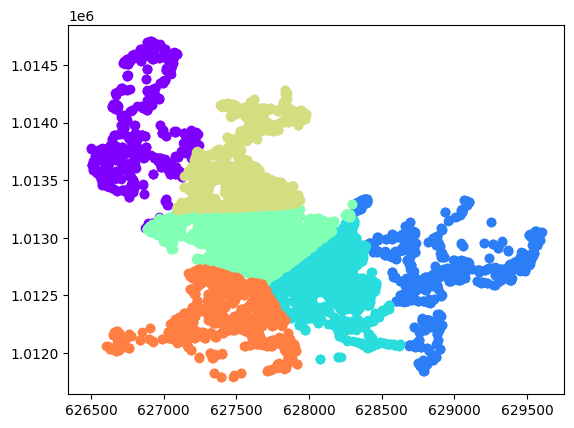

In [38]:
groups = distributed_groups
import matplotlib.pyplot as plt
from matplotlib import cm
colors = cm.rainbow([i/len(groups) for i in range(len(groups))])
for i, group in enumerate(groups):
    x = [point.x for point in group.members]
    y = [point.y for point in group.members]
#     x1 = [group.centroid.x]
#     y1 = [group.centroid.y]
    plt.scatter(x, y, color=colors[i], label=f"Group {i+1}")
#     plt.scatter(x1, y1, color='black', label=f"Group {i+1}")

# plt.legend()
plt.show()



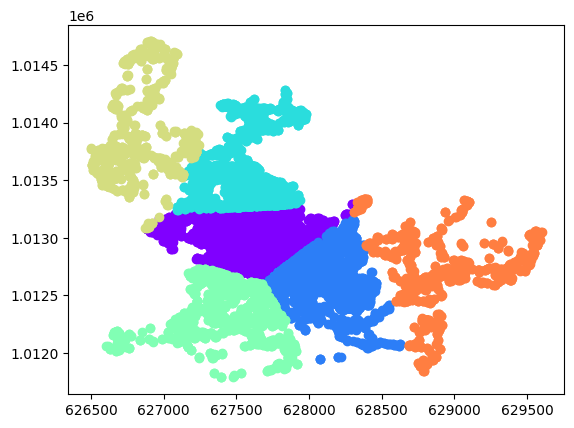

In [39]:
groups = optimized_groups
import matplotlib.pyplot as plt
from matplotlib import cm
colors = cm.rainbow([i/len(groups) for i in range(len(groups))])
for i, group in enumerate(groups):
    x = [point.x for point in group.members]
    y = [point.y for point in group.members]
#     x1 = [group.centroid.x]
#     y1 = [group.centroid.y]
    plt.scatter(x, y, color=colors[i], label=f"Group {i+1}")
#     plt.scatter(x1, y1, color='black', label=f"Group {i+1}")

# plt.legend()
plt.show()



## 3. Voronoi Tesselation using centroids


As stated in the paper the above is a little irregular and not the best idea for generation of a aggregation cells in a trajectory. Adding more points to it so that it looks more regular

### Developing flow-field/movement vectors using voronoi cells
### 3.3 Partioning the territory - 

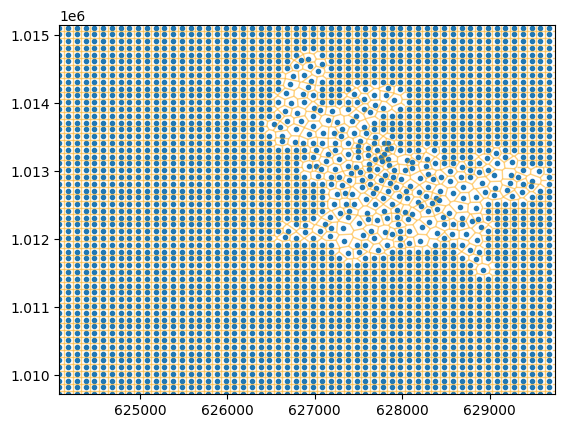

In [23]:
from scipy.spatial import Voronoi, voronoi_plot_2d
import numpy as np
import shapely.geometry as geometry
import matplotlib.pyplot as plt


def plotVoronoiDiagram(centroids):
# Define the bounding box
    xMin, xMax, yMin, yMax = 624079.8465020715, 629752.8465020715, 1009715.5668793379, 1015157.5668793379


    # Define the cell width
    cellWidth = max_radius

    # Generate a set of points
    x, y = np.meshgrid(np.arange(xMin, xMax, cellWidth),
                       np.arange(yMin, yMax, cellWidth))
    points = np.column_stack((x.ravel()[:: -1], y.ravel()))

    for centroid in centroids:
        points = points[(np.sqrt(np.sum((points - centroid)**2 , axis = 1)) > max_radius)]

    points = (np.concatenate((points, np.array(centroids)), axis = 0))
    # Compute the Voronoi diagram
    vor = Voronoi(points)
    fig = voronoi_plot_2d(vor, show_vertices=False, line_colors='orange', line_width=1, line_alpha=0.5)

    ax = fig.gca()

    # iterate over Voronoi regions and label cells with their indices
#     for i, region in enumerate(vor.regions):
#         if -1 not in region:  # ignore infinite regions
#             centroid = vor.vertices[region].mean(axis=0)
#             ax.text(centroid[0], centroid[1], str(i), color='red', ha='center', va='center')

    # Plot the Voronoi diagram


    plt.xlim([xMin, xMax])
    plt.ylim([yMin, yMax])
    plt.show()
    return vor 

max_radius = 100
vor = plotVoronoiDiagram(centroids)


### 3.4 Diving Trajectories into segments 
Finding the cells of starting,ending with timeframes - finding the cells which are closest to the points


In [ ]:
closest_region_indices = []
for p in extracted_points[['utm-easting', 'utm-northing']].to_numpy():
    distances = np.sqrt(np.sum((vor.points - p)**2, axis=1))
    closest_point_idx = np.argmin(distances)
    closest_region_idx = vor.point_region[closest_point_idx]
    closest_region_indices.append(closest_region_idx)

In [ ]:
extracted_points['closest_cell'] = closest_region_indices

# 3.5 Aggregation of data

In [ ]:
# Identify the rows where the value of the 'Name' column changes
mask = extracted_points['closest_cell'].ne(extracted_points['closest_cell'].shift())

# Save the rows where the value of the 'Name' column changes to a new DataFrame
result = extracted_points.loc[mask]

In [ ]:
result = result [
    ['closest_cell', 'trajectory_number']
]

# assuming your dataframe is called 'df'
trajectory_column = 'trajectory_number'  # replace with the name of your column

# group by the trajectory column and convert to dictionary of lists
trajectory_dict = result.groupby(trajectory_column).apply(lambda x: x.drop(columns=trajectory_column).values.tolist()).to_dict()
trajectory_dict = {k: [item for sublist in v for item in sublist] for k, v in trajectory_dict.items()}


The above dictionary now has a list of cells each trajectory goes to. Trying to plot arrows from one cell to another and then plotting a different color for each of the 329 different trajectories

In [ ]:
trajectory_dict[34]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

# generate some random points and compute Voronoi diagram
# cell_index
# list of cell indices to plot
cell_indices = trajectory_dict[int(input())]
print(cell_indices)
# compute centroids of each cell
centroids_voronoi = []
for i in cell_indices:
    region = vor.regions[vor.point_region[i]]
    if -1 not in region:
        centroid = np.mean([vor.vertices[j] for j in region], axis=0)
        centroids_voronoi.append(centroid)

# plot lines passing through centroids
# fig, ax = plt.subplots()
# for centroid in centroids_voronoi:
#     x, y = zip(*[centroid, (points[0].x , points[0].y)])
#     ax.plot(x, y, color='red')
    
# iterate over Voronoi regions and label cells with their indices
for i, region in enumerate(vor.regions):
    if -1 not in region:  # ignore infinite regions
        centroid = vor.vertices[region].mean(axis=0)
        ax.text(centroid[0], centroid[1], str(i), color='red', ha='center', va='center')


# plot Voronoi diagram
voronoi_plot_2d(vor, ax=ax)

# show plot
plt.show()


In [ ]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_3d
import matplotlib.pyplot as plt

# Generate some random 3D points
points = np.random.rand(100, 3)

# Compute the Voronoi diagram
vor = Voronoi(points)

# Plot the Voronoi diagram in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
voronoi_plot_3d(vor, ax=ax)

plt.show()
